In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import sys
from velocity_stats import VelocityData

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
def plot_config():
        plt.rc('xtick', labelsize=14)
        plt.rc('ytick', labelsize=14)
        plt.rc('xtick.major', size=8.0, width=1.0)
        plt.rc('xtick.minor', size=4.0, width=1.0)
        plt.rc('ytick.major', size=8.0, width=1.0)
        plt.rc('ytick.minor', size=4.0, width=1.0)
        plt.rc('axes', labelsize=16)
        plt.rc('legend', fontsize=14)
        plt.rc('axes', titlesize=16)
        plt.rc('text', usetex=True)
        plt.rc('font', family='serif')
        plt.rc('font', serif='cm')

plot_config()

In [3]:
fine = VelocityData('./postProcessing/center_probe/290.5/U')
coarse = VelocityData('./postProcessing_60/center_probe/50/U')

## Convention (ref. Tennekes and Lumly)
$\displaystyle \tilde{u} = u + U$

## Velocity Fluctuations

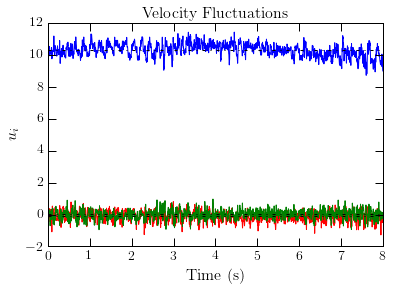

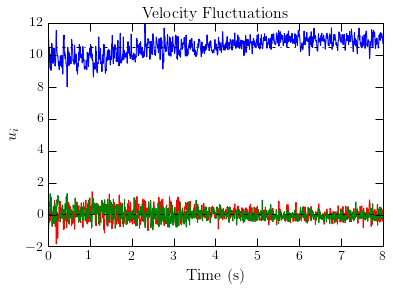

In [4]:
fine.velocity_fluctuation_plot(N=32000)
coarse.velocity_fluctuation_plot(N=32000)
plt.show()

## Calculating velocity autocorrelation using Wiener-Khinchin Theorem

$\displaystyle R(s) = \lim_{T\to\infty} \left( \frac{1}{T} \right) \int_0^T u(t) \, u(t+s) \, dt$

$\displaystyle \hat{R}(s) = \mathcal{F}_\nu \left[ u_{\nu}(t) \; u^*_{\nu}(t) \right]$

$\displaystyle \sigma^2 = \frac{1}{N} \sum_{t=0}^{N-1} u(t) u(t) = R(0)$

$\displaystyle \rho(s) = \frac{R(s)}{\sigma^2}$

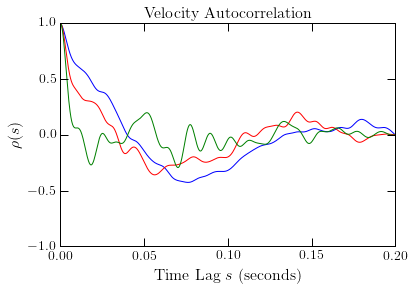

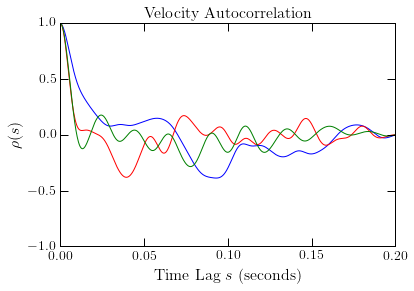

In [5]:
fine.autocorr_fourier_plot(N=800, step=1)
coarse.autocorr_fourier_plot(N=800, step=1)

### Calculating velocity autocorrelation using discrete values ###

Assuming $\overline{u} = 0$

$\displaystyle R(s) = \frac{1}{N} \sum_{t=0}^{N-1-s} u(t) u(t+s)$

$\displaystyle \sigma^2 = \frac{1}{N} \sum_{t=0}^{N-1} u(t) u(t) = R(0)$

$\displaystyle \rho(s) = \frac{R(s)}{\sigma^2}$

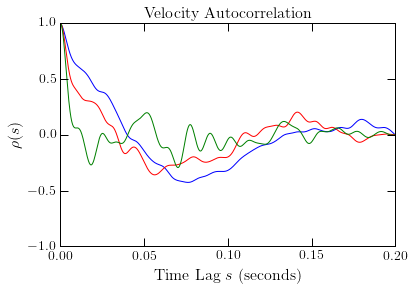

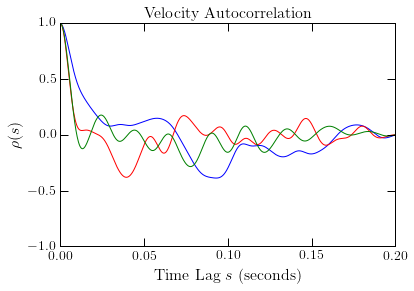

In [6]:
fine.autocorr_sum_plot(N=None, lag=800, step=1)
coarse.autocorr_sum_plot(N=None, lag=800, step=1)

### Conclustion: Wiener-Khinchin Method and Summation Method Agree ####

#### Reference for Summation Method:
#### NIST/SEMATECH e-Handbook of Statistical Methods, http://www.itl.nist.gov/div898/handbook/ ###

## Comparing Autocorrelation with Varying Max Lag

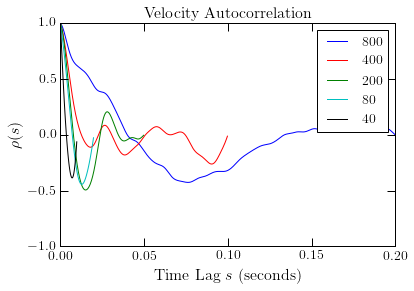

In [7]:
# Autocorrelation functions using variable number of points
# from the end of the data and corresponding lags (max lag = N)
lags = [800, 400, 200, 80, 40]
colors = ['b', 'r', 'g', 'c', 'k']
fig, ax = plt.subplots(1)
for i, c in zip(lags, colors):
    fine.autocorr(summation=False, N=i, lag=i)
    x_axis_vals = np.arange(fine.Rxx.size)*fine.dt
    ax.plot(x_axis_vals, fine.Rxx, color=c, label=fine.N)
ax.set_title("Velocity Autocorrelation")
ax.set_xlabel("Time Lag $s$ (seconds)")
ax.set_ylabel("$\\rho(s)$")
ax.set_ylim(-1,1)
ax.legend()
plt.show()

## Moving Average of Velocity

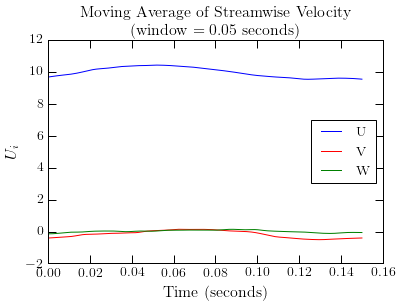

In [8]:
window = 200
fine.reset_data()
fine.resize_data(-800)
weights = np.repeat(1.0, window) / window
fine.u_mavg = np.convolve(fine.u, weights, 'valid')
fine.v_mavg = np.convolve(fine.v, weights, 'valid')
fine.w_mavg = np.convolve(fine.w, weights, 'valid')

fig, ax = plt.subplots(1)
x_axis_vals = np.arange(len(fine.u_mavg))*fine.dt
ax.plot(x_axis_vals, fine.u_mavg, color='b', label='U')
ax.plot(x_axis_vals, fine.v_mavg, color='r', label='V')
ax.plot(x_axis_vals, fine.w_mavg, color='g', label='W')
ax.set_title("Moving Average of Streamwise Velocity"
             +"\n(window $= {}$ seconds)".format(window*fine.dt))
ax.set_xlabel("Time (seconds)")
ax.set_ylabel("$U_i$")
#ax.set_ylim(-1,1)
ax.legend(loc='best')
plt.show()

### Conclusion: Not Quite a Statistically Stable